## Homework 3: Mass on a spring

1. Add (detailed) comments the python code below which computes the time dependence of position and velocity for the simple harmonic oscillator (e.g., mass on a spring) using the Euler method.  Feel free to modify the code to your liking!   

2. Compute the total energy $E^n$ per unit mass at each time step, $t^n$.  Compute the time dependence of the difference 

$$ \Delta^n = \frac{E^n - E^0}{E^0}$$

for *at least* one complete cycle and plot $\Delta^n$ as a function of time.  Is the difference $\Delta^n$ uniformly small throughout the cycle?  What are the units of $k$?

We know the total energy of the oscillator at any given time is 
$$E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$$

If we want to know the Energy per unit mass just divide the equation by the mass. Which results in:
$$E/m = \frac{1}{2}v^2 + \frac{1}{2m}kx^2$$



Text(0, 0.5, 'Energy Difference (J)')

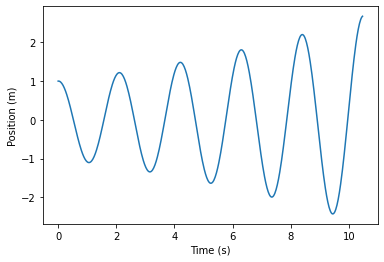

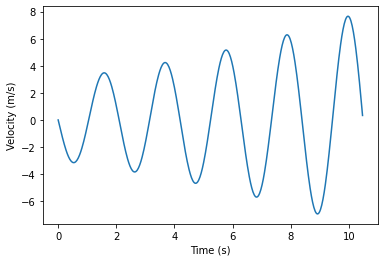

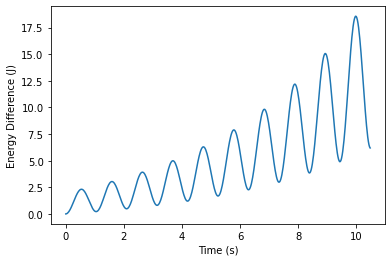

In [ ]:
# Simple harmonic oscillator.
import numpy as np
from matplotlib import pyplot as plt

#Function: Simple Harmonic Oscillator
#Parameters: Initial Position, Initial Time, Spring Constant, Mass, Period, Time Interval Length
#Output: Arrays of the position, velocity, time, and Energy Difference in Timesteps
def Simple_Harmonic_Oscillator_Euler(x0,v0,k,m,T,dt):
    #Three lists that store each of the dimensions of the Oscillator
    x = []
    v = []
    time = []
    
    #Added list for the second problem. Represents the time dependence of the difference of the curren energy and initial energy
    timediff = []
    E0 = (1/(2))*omega2*(x0**2) + (1/2)*(v0**2)
    #Initial time of the oscillator
    t = 0.0
    #Final time of the oscillator, which is two times the period
    tfinal = 5*T
    #This will loop until the initial time reaches the final time
    while t < tfinal:
        #Appending all of the dimensional data into the list defined at the beginning of the function
        time.append(t)
        x.append(x0)
        v.append(v0)
        
        #Added for Problem 2.
        #Calculates the current energy, calculates the discrpancy with original energy, and adds it to the array.
        E_p_m = (1/(2)*omega2*(x0**2) + (1/2)*(v0**2)
        delta_n = (E_p_m - E0)/E0
        timediff.append(delta_n)

        #Inlined change of position and velocity. 
        #You can clearly see that the sign changes since the both the velocity and position rely on each other. 
        #Thus making it oscillatory
        vp = v0 - (k/m)**2*x0*dt
        x0 = x0 + v0*dt
        v0 = vp 
        #x0 = xp
        t = t+dt
    return x, v, time, timediff

#Omega2 is the angular frequency squared
omega2 = 9 #rad^2/s^2
#m = 1 #kg
#k = np.sqrt(omega2)*m #rad^2*kg/s^2 or N/m
#Changed 3pi to 2pi (fixed)
T = 2*np.pi/np.sqrt(omega2)
#Time-step size
dt = 0.01*T
#Initial Position
x0 = 1.0
#Initial velocity
v0 = 0.0

#Calls the function and stores the outputs into another list
[x,v,time,timediff] = Simple_Harmonic_Oscillator_Euler(x0,v0,k,m,T,dt)

#Plots the Position vs Time 
plt.figure(1)
plt.plot(time,x)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
#Plots the Velocity vs Time
plt.figure(2)
plt.plot(time,v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
#Plots the Energy Difference vs Time
plt.figure(3)
plt.plot(time,timediff)
#plt.plot(np.log(time),np.log(timediff))
plt.xlabel('Time (s)')
plt.ylabel('Energy Difference (J)')

Comment about why the graphs look the way they do: $$$$
The reason why we got what looked like a driven oscillator before, when it clearly wasn't, was because of the gradual increase of error in using the Euler Method. One thing we can do to decrease the error in this case is just decrease the time interval. 

As you can see above, the energy difference between the initial state of the oscillator and the subsequent states increases as time goes on and the by the amount it increases is greater each time interval is greater than the amount in increased previously. Therefore not making them uniformly small changes.
